<a href="https://colab.research.google.com/github/polo-music/bussiness-analytics-ifood/blob/main/bussiness_analytics_ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bussiness analytics - iFood Company
This dataset is given by the iFood Company, the largest food delivery company in Brasil, in order to add a new bussiness analytics expert in its team. The basic idea is to do some exploratori data analysis on the dataset to show the pertinent skills of bussiness and model analysis.

In [60]:
library(tidyverse)
library(RColorBrewer)

# We load the public dataset from GitHub
df <- read.csv('https://raw.githubusercontent.com/nailson/ifood-data-business-analyst-test/master/ifood_df.csv')

In [61]:
# We can start with the information of the dataset
glimpse(df)

Rows: 2,205
Columns: 39
$ Income               <dbl> 58138, 46344, 71613, 26646, 58293, 62513, 55635, …
$ Kidhome              <int> 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0…
$ Teenhome             <int> 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0…
$ Recency              <int> 58, 38, 26, 26, 94, 16, 34, 32, 19, 68, 59, 82, 5…
$ MntWines             <int> 635, 11, 426, 11, 173, 520, 235, 76, 14, 28, 6, 1…
$ MntFruits            <int> 88, 1, 49, 4, 43, 42, 65, 10, 0, 0, 16, 61, 2, 14…
$ MntMeatProducts      <int> 546, 6, 127, 20, 118, 98, 164, 56, 24, 6, 11, 480…
$ MntFishProducts      <int> 172, 2, 111, 10, 46, 0, 50, 3, 3, 1, 11, 225, 3, …
$ MntSweetProducts     <int> 88, 1, 21, 3, 27, 42, 49, 1, 3, 1, 1, 112, 5, 1, …
$ MntGoldProds         <int> 88, 6, 42, 5, 15, 14, 27, 23, 2, 13, 16, 30, 14, …
$ NumDealsPurchases    <int> 3, 2, 1, 2, 5, 2, 4, 2, 1, 1, 1, 1, 3, 1, 1, 3, 2…
$ NumWebPurchases      <int> 8, 1, 8, 2, 5, 6, 7, 4, 3, 1, 2, 3, 6, 1, 7, 3, 4…
$ NumCatalogPurc

As we can see, there are some variables that should be grouped as factors (p.e. marital status, education level or accepted campagne), these are the categorical variables. To do so, we will create different factor vectors and apply the factorization of the variables.




In [62]:
# Create the education vector
education_vector <- c('Basic', '2n Cycle', 'Graduation', 'Master', 'PhD')
# Convert the vector to factor
education_factor_vector <- factor(education_vector, levels = education_vector)

# Create the marital vector
marital_vector <- c('Single', 'Together', 'Divorced', 'Married', 'Widow')
# Convert the vector to factor
marital_factor_vector <- factor(marital_vector, levels = marital_vector)

In [63]:
df_f <- df %>%
  mutate(Education = case_when(
    education_Basic == 1 ~ 'Basic',
    education_2n.Cycle == 1 ~ '2n Cycle',
    education_Graduation == 1 ~ 'Graduation',
    education_Master == 1 ~ 'Master',
    education_PhD == 1 ~ 'PhD'
  )) %>%
  mutate(Marital_Status = case_when(
    marital_Divorced == 1 ~ 'Divorced',
    marital_Married == 1 ~ 'Married',
    marital_Single == 1 ~ 'Single',
    marital_Together == 1 ~ 'Together',
    marital_Widow == 1 ~ 'Widow'
  )) %>%
  mutate(Accepted_Campaign = case_when(
    AcceptedCmp1 == 1 ~ 'Campaign 1',
    AcceptedCmp2 == 1 ~ 'Campaign 2',
    AcceptedCmp3 == 1 ~ 'Campaign 3',
    AcceptedCmp4 == 1 ~ 'Campaign 4',
    AcceptedCmp5 == 1 ~ 'Campaign 5',
    TRUE ~ 'None'
  )) %>%
  select(-c(education_Basic, education_2n.Cycle, education_Graduation, education_Master, education_PhD, marital_Divorced,
  marital_Married, marital_Single, marital_Together, marital_Widow, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4,
  AcceptedCmp5))

In [64]:
df_f <- df_f %>%
  mutate(Education = as.factor(Education)) %>%
  mutate(Marital_Status = as.factor(Marital_Status)) %>%
  mutate(Accepted_Campaign = as.factor(Accepted_Campaign))

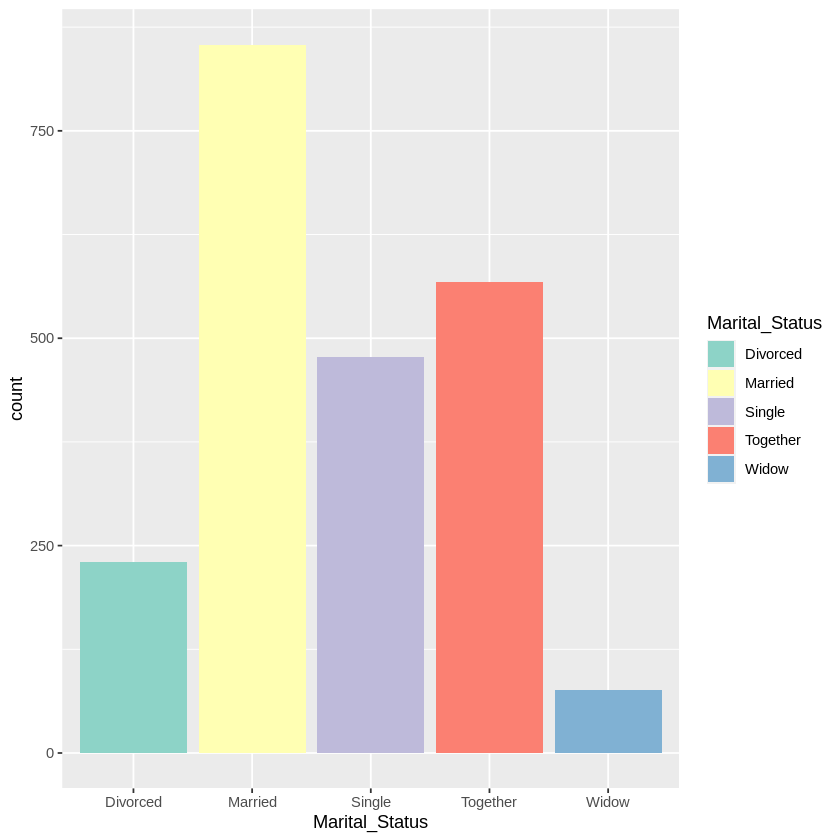

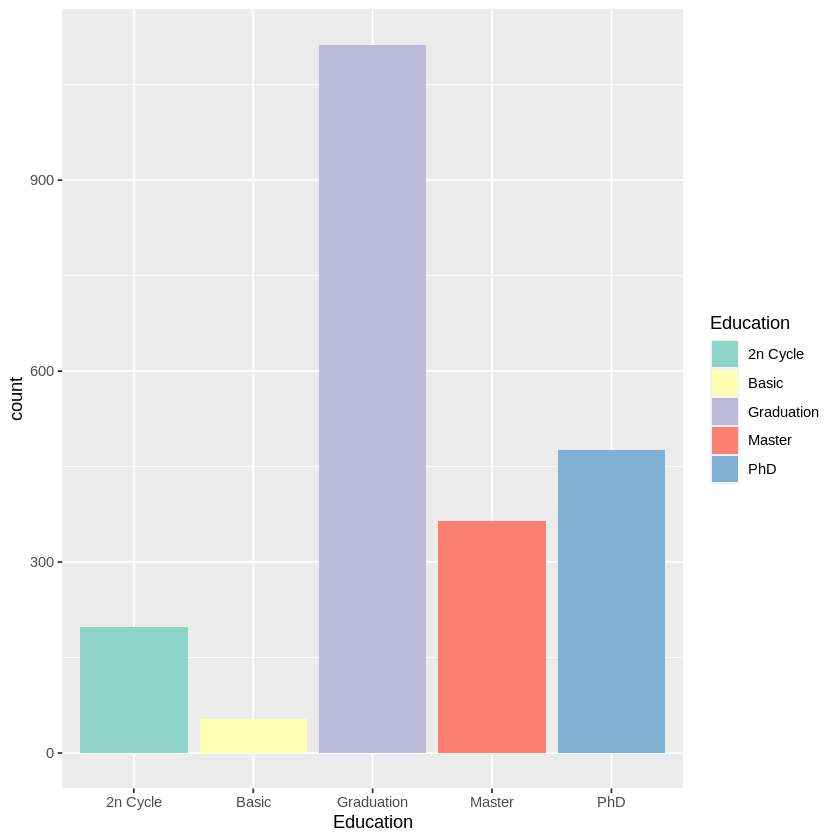

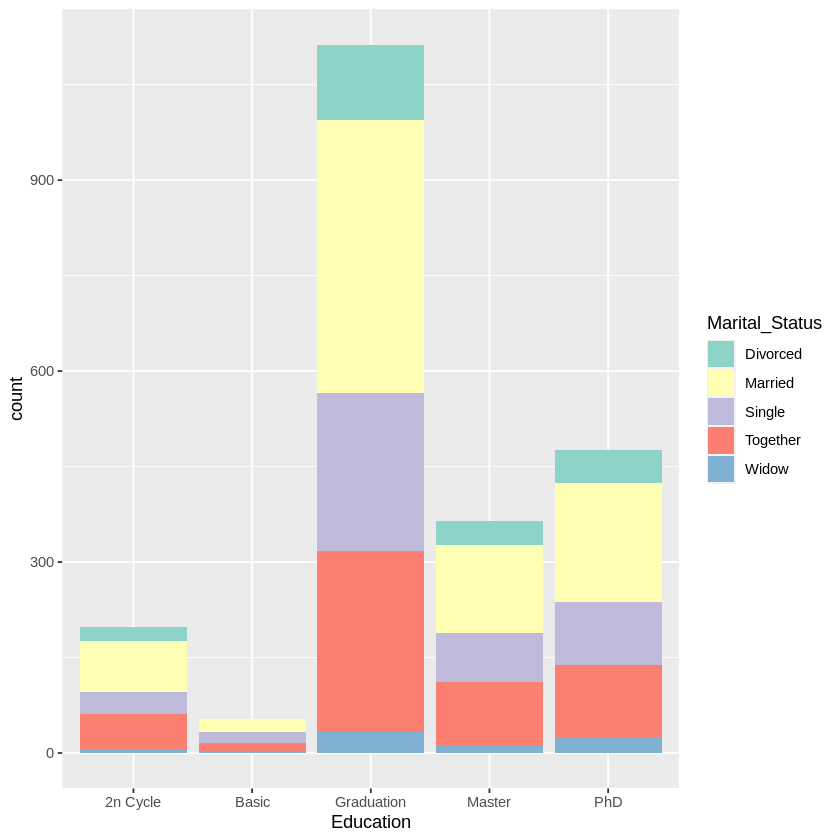

In [79]:
df_f %>%
  ggplot(mapping = aes(x = Marital_Status, fill = Marital_Status)) +
    geom_bar() +
    scale_fill_brewer(palette = 'Set3') 

df_f %>%
  ggplot(mapping = aes(x = Education, fill = Education)) +
    geom_bar() +
    scale_fill_brewer(palette = 'Set3')

df_f %>%
  ggplot(mapping = aes(x = Education, fill = Marital_Status)) +
    geom_bar() +
    scale_fill_brewer(palette = 'Set3')

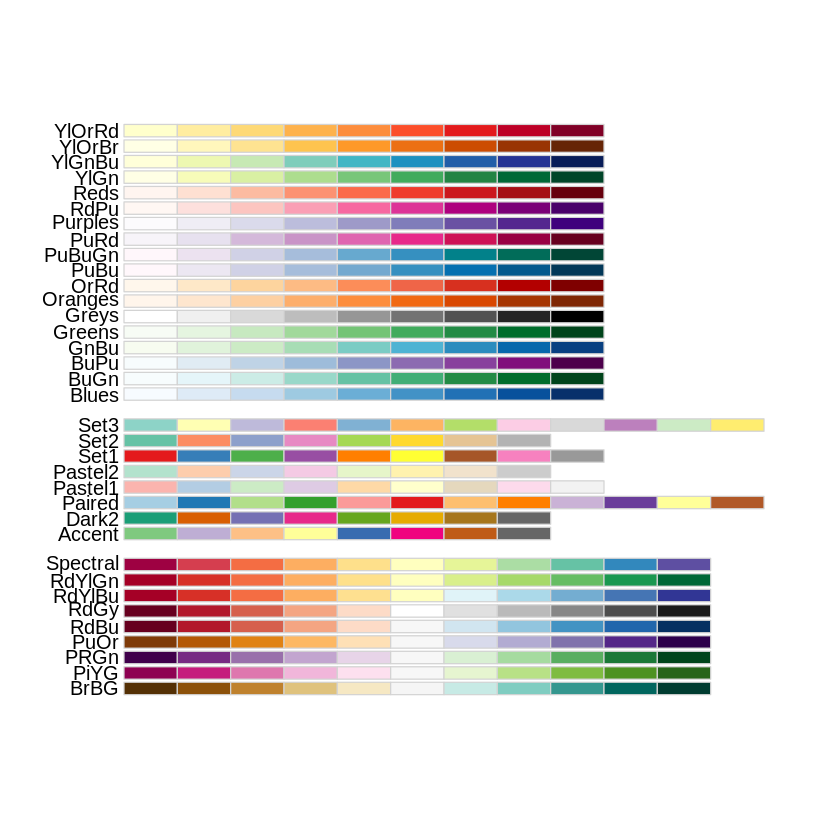

In [74]:
display.brewer.all()